In [47]:
!pip uninstall umap
!pip install umap-learn
# !pip install -U scikit-learn

^C
^C


In [1]:
from sklearn import datasets
import json
from openTSNE import TSNE
import umap
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

embedding = TSNE().fit(x)

In [43]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [44]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y
data

,Comp1,Comp2,Label
0,2.408572,15.539382,0
1,4.474758,17.348204,0
2,4.742303,16.270026,0
3,5.017156,16.787656,0
4,2.367274,15.635133,0
...,...,...,...
145,-5.139887,-9.295451,2
146,-2.481548,-7.198541,2
147,-4.328312,-8.510721,2
148,-5.254568,-8.603899,2


In [46]:
out = data.to_json(orient='records')
with open('tsne.json', 'w') as f:
    f.write(out)

C:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(30.96529029320989, 0.5, 'Comp 2')

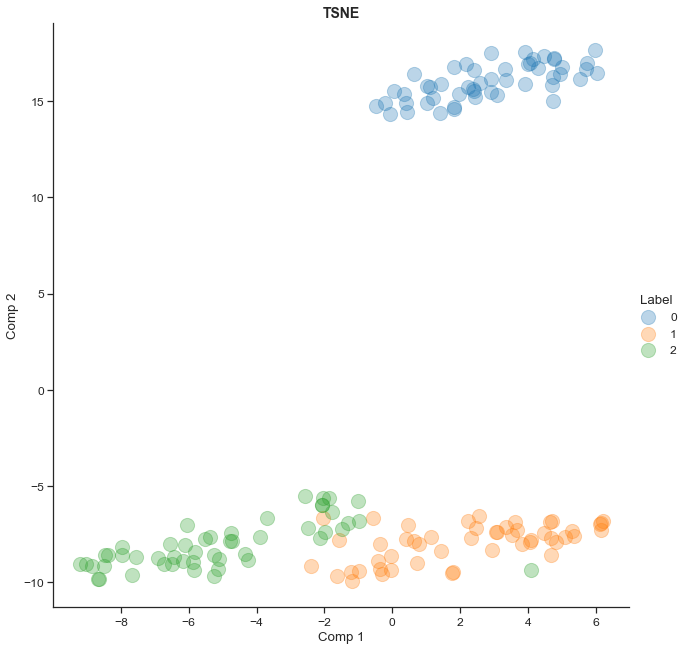

In [5]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3}
          )

plt.title("TSNE", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

### Tuned TSNE with data scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
tsne = TSNE(
    perplexity=23,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=False,
)

x, y = iris["data"], iris["target"]

embedding = tsne.fit(scaler.fit_transform(x))

data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y

C:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(30.96529029320989, 0.5, 'Comp 2')

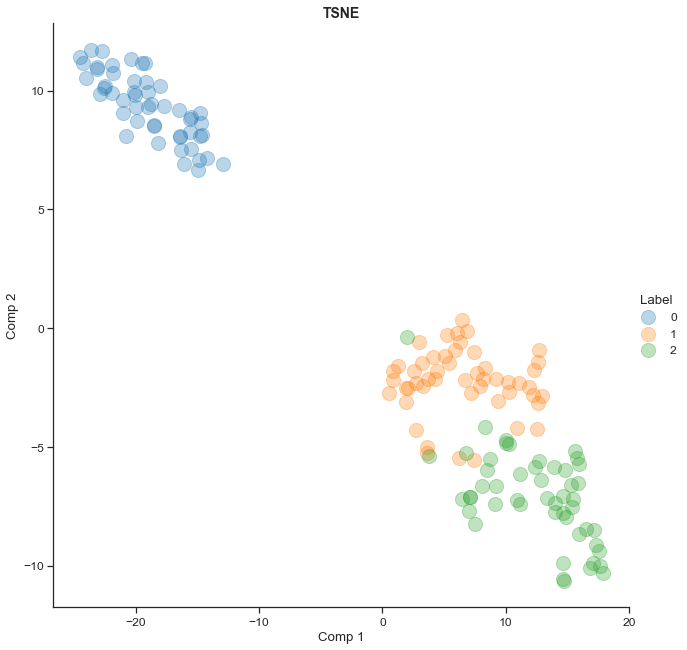

In [49]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3}
          )

plt.title("TSNE", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

In [50]:
out = data.to_json(orient='records')
with open('tsne1.json', 'w') as f:
    f.write(out)

### UMAP

In [10]:
reducer = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [11]:
x, y = iris["data"], iris["target"]

embedding = reducer.fit_transform(scaler.fit_transform(x))

In [12]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y

C:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(30.410738788580247, 0.5, 'Comp 2')

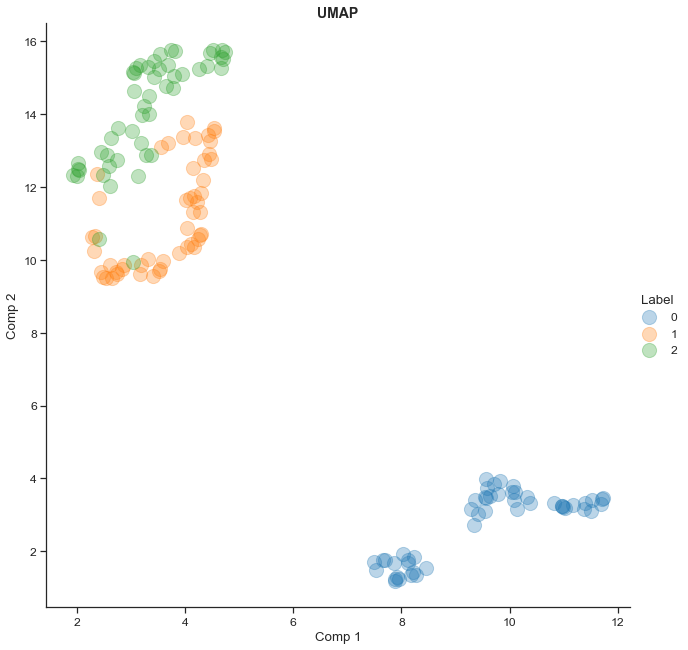

In [13]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3}
          )

plt.title("UMAP", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

In [15]:
# TODO add the Target Information into  your json file
with open('umap.json', 'w') as f:
    json.dump(np.array(data).tolist(), f)

### tuned umap

In [33]:
reducer = umap.UMAP(a=None, angular_rp_forest=True, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [34]:
x, y = iris["data"], iris["target"]

embedding = reducer.fit_transform(scaler.fit_transform(x))

In [35]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y

C:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(30.410738788580247, 0.5, 'Comp 2')

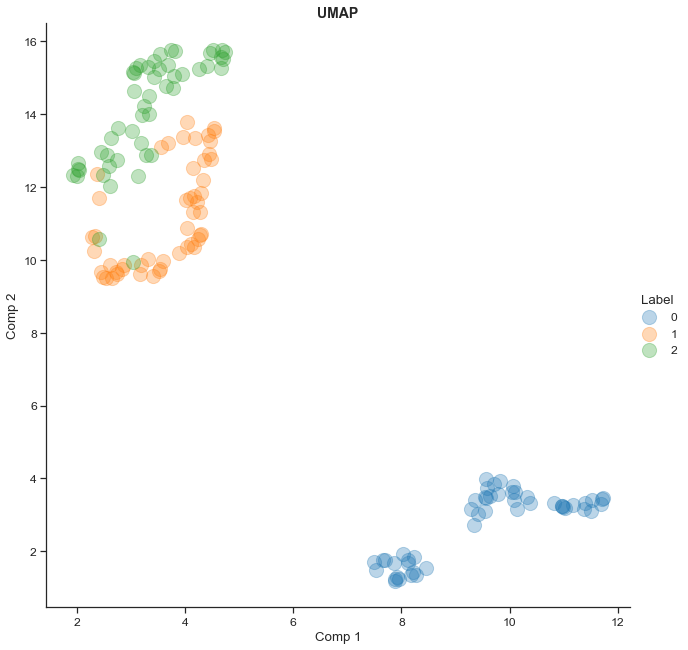

In [36]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3}
          )

plt.title("UMAP", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

In [37]:
out = data.to_json(orient='records')
with open('umap.json', 'w') as f:
    f.write(out)

### Sklearn manifold

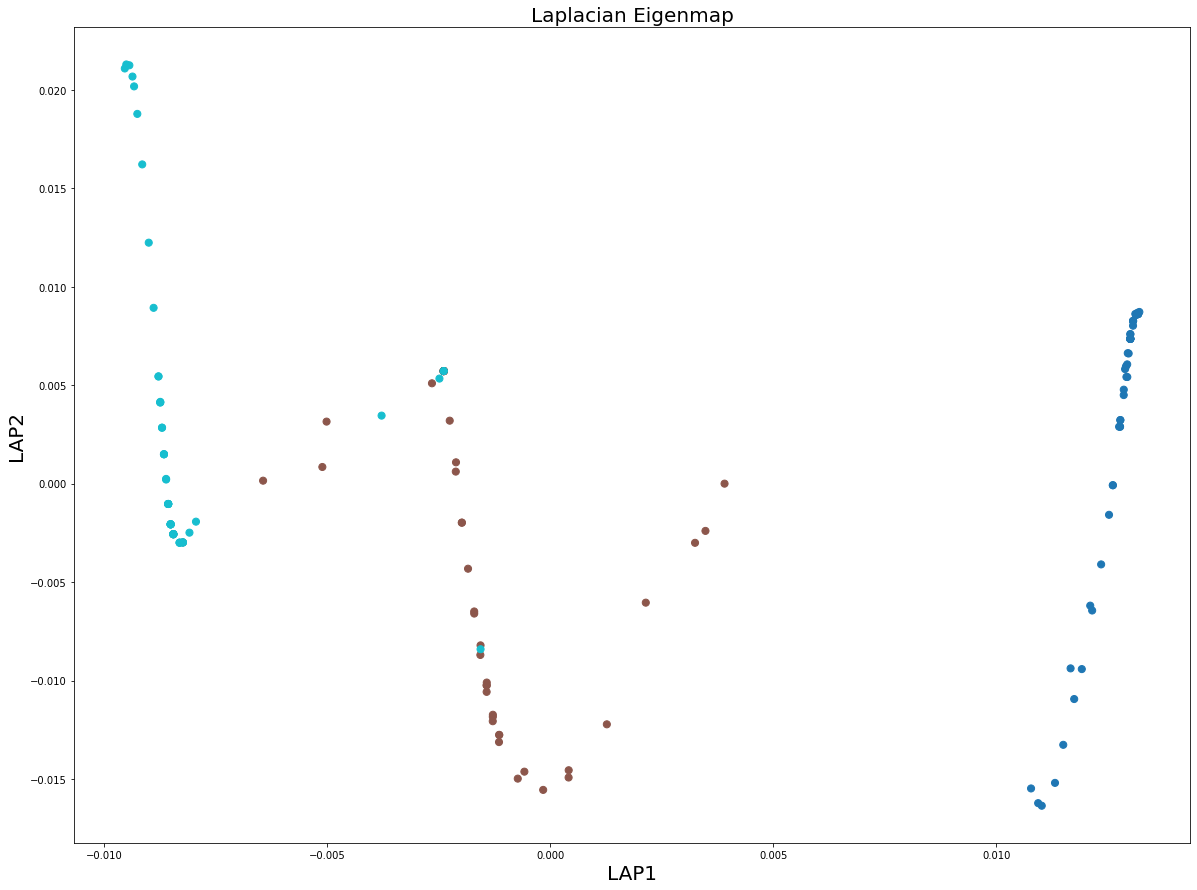

In [11]:
from sklearn.manifold import SpectralEmbedding
model = SpectralEmbedding(n_components = 2, n_neighbors = 100)
se = model.fit_transform(x)
plt.figure(figsize=(20,15))
plt.scatter(se[:, 0], se[:, 1], c = y.astype(int), cmap = 'tab10', s = 50)
plt.title('Laplacian Eigenmap', fontsize = 20)
plt.xlabel("LAP1", fontsize = 20)
plt.ylabel("LAP2", fontsize = 20)
plt.show()

In [12]:
df = pd.DataFrame(se, columns=["Comp1", "Comp2"])
df["Label"] = y
df["Comp1"] = df["Comp1"] * 100
df["Comp2"] = df["Comp2"] * 100

df

,Comp1,Comp2,Label
0,1.300743,0.759684,0
1,1.285890,0.450207,0
2,1.300642,0.735829,0
3,1.300642,0.735829,0
4,1.306853,0.826527,0
...,...,...,...
145,-0.851513,-0.206370,2
146,-0.831368,-0.299663,2
147,-0.845416,-0.256563,2
148,-0.856928,-0.103063,2


In [13]:
out = df.to_json(orient='records')

In [14]:
with open('umap1.json', 'w') as f:
    f.write(out)